In [1]:
import sys
import pyro
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDelta
from pyro.optim import Adam
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
sys.path.append('../')

In [2]:
from design import model

In [3]:
circuit = model.CircuitModel()

In [4]:
circuit.add_neuron('a', vary=False)
circuit.add_neuron('b', vary=False)
circuit.add_neuron('c', nonlin=torch.tanh, offset=None, gain=None)
circuit.add_neuron('d', nonlin=torch.tanh, offset=None, gain=None)

In [5]:
a = np.random.normal(0, 1, 100)[:, None]
b = np.random.normal(0, 1, 100)[:, None]
c = np.tanh(0.2 * a + 0.8 * b)  # TODO normalize before
c_data = c + np.random.normal(0, np.ones(50) * 0.1)[None, :]
c_data = c_data * np.random.random(50)[None, :]
d = np.tanh(0.3 * a + 0.3 * b + 0.4 * c)
d_data = d + np.random.normal(0, np.ones(35) * 0.1)[None, :]
d_data = d_data * np.random.random(35)[None, :]

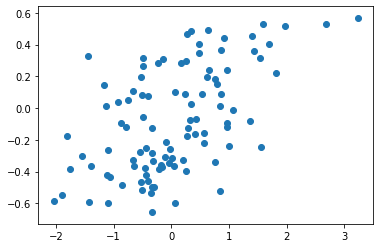

In [6]:
plt.scatter(a, d_data[:, 4])

In [7]:
circuit.add_synapse('a', 'c', sign=1.0)
circuit.add_synapse('b', 'c', sign=1.0)
circuit.add_synapse('a', 'd', sign=1.0)
circuit.add_synapse('b', 'd', sign=1.0)
circuit.add_synapse('c', 'd', sign=1.0)

In [8]:
circuit.add_data('c', c_data)
circuit.add_data('d', d_data)
circuit.add_data('a', a, scale=0)
circuit.add_data('b', b, scale=0)

In [9]:
from ccmf.inference import map

In [10]:
est = map.MAPEstimator(circuit.conditioned_model)

In [13]:
est.fit()

100%|██████████| 1000/1000 [00:06<00:00, 152.55it/s]


MAPEstimator(guide=None, loss=None, model=None, optimizer=None)

In [14]:
est.map_estimates

{'a->c': tensor(0.3119),
 'b->c': tensor(0.4552),
 'c': tensor([ 0.3128,  0.2883,  0.1181,  0.0734, -0.1280,  0.1386, -0.0117, -0.2585,
         -0.2350,  0.0239, -0.0470,  0.0478, -0.0662, -0.1625, -0.1232, -0.1555,
         -0.2108, -0.1840, -0.0871,  0.2404,  0.0166, -0.1753, -0.1109, -0.1944,
         -0.3171, -0.3315, -0.1876,  0.1377, -0.0410, -0.1462,  0.3120, -0.0849,
          0.1386, -0.1974,  0.2455,  0.2561, -0.1408,  0.1857, -0.1469,  0.3190,
          0.2693, -0.0333, -0.2576, -0.2267, -0.1086,  0.1515, -0.1969,  0.2724,
          0.1473, -0.0724,  0.1672, -0.1129,  0.3149, -0.2574,  0.0608, -0.2303,
         -0.1845, -0.1783, -0.3229,  0.1005,  0.3118,  0.1247,  0.0433, -0.1443,
          0.0967,  0.1638, -0.1122, -0.0288,  0.2141, -0.0095,  0.2292, -0.2216,
         -0.2400, -0.0975, -0.1375,  0.2361, -0.1002, -0.2808, -0.1638,  0.0382,
         -0.0727,  0.2690,  0.0612,  0.0140,  0.2076,  0.0860,  0.2692,  0.3027,
         -0.0793, -0.0524, -0.1990,  0.2110, -0.2902, 

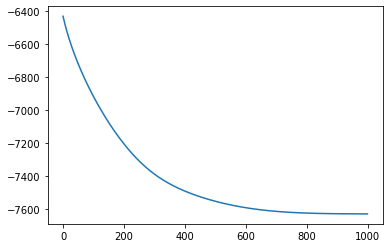

In [15]:
plt.plot(est.loss_curve)

In [16]:
pyro.param('AutoDelta.a->c')

tensor(0.3119, grad_fn=<AddBackward0>)

In [17]:
pyro.param('AutoDelta.b->c')

tensor(0.4552, grad_fn=<AddBackward0>)

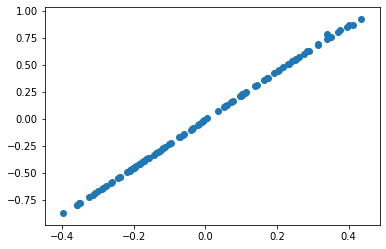

In [18]:
plt.scatter(
    np.array(pyro.param('AutoDelta.d').detach()), 
    d
)

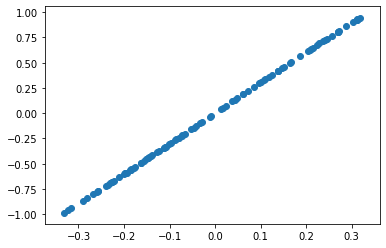

In [19]:
plt.scatter(
    np.array(pyro.param('AutoDelta.c').detach()), 
    c
)